In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
customers = pd.read_csv('/content/zeotap_Customers.csv')
products = pd.read_csv('/content/zeotap_Products.csv')
transactions = pd.read_csv('/content/zeotap_Transactions.csv')

In [41]:
print("\nMissing Values in Customers:")
print(customers.isnull().sum())

print("\nMissing Values in Products:")
print(products.isnull().sum())

print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())


Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [42]:
print("Duplicate Rows in Customers:", customers.duplicated().sum())
print("Duplicate Rows in Products:", products.duplicated().sum())
print("\nDuplicate Rows in Transactions:", transactions.duplicated().sum())

Duplicate Rows in Customers: 0
Duplicate Rows in Products: 0

Duplicate Rows in Transactions: 0


In [43]:
merged_data = transactions.merge(products, on='ProductID', how='left').merge(customers, on='CustomerID', how='left')


Top 5 Products by Sales:
ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


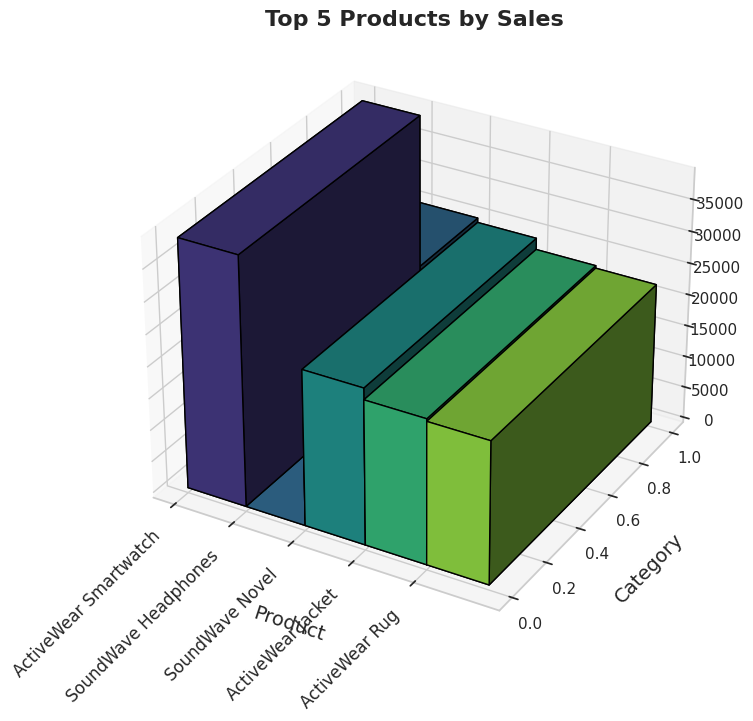

In [44]:
# 1. Top 5 products by sales
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head()
print("\nTop 5 Products by Sales:")
print(top_products)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

x_pos = np.arange(len(top_products))
y_pos = np.zeros(len(top_products))
z_pos = np.zeros(len(top_products))
dx = np.ones(len(top_products))
dy = np.ones(len(top_products))
dz = top_products.values

colors = sns.color_palette("viridis", len(top_products))

for i in range(len(top_products)):
    ax.bar3d(x_pos[i], y_pos[i], z_pos[i], dx[i], dy[i], dz[i], color=colors[i], edgecolor="black")

ax.set_title("Top 5 Products by Sales", fontsize=16, fontweight='bold')
ax.set_xlabel("Product", fontsize=14, labelpad=15)
ax.set_ylabel("Category", fontsize=14, labelpad=15)
ax.set_zlabel("Total Sales", fontsize=14, labelpad=15)
ax.set_xticks(x_pos)
ax.set_xticklabels(top_products.index, rotation=45, ha='right', fontsize=12)

ax.yaxis.set_visible(False)
ax.grid(visible=True, linestyle='--', alpha=0.6)

plt.show()

<ipython-input-45-df60c51b88f9>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stats_values, y=stats_labels, palette="mako", orient="h")


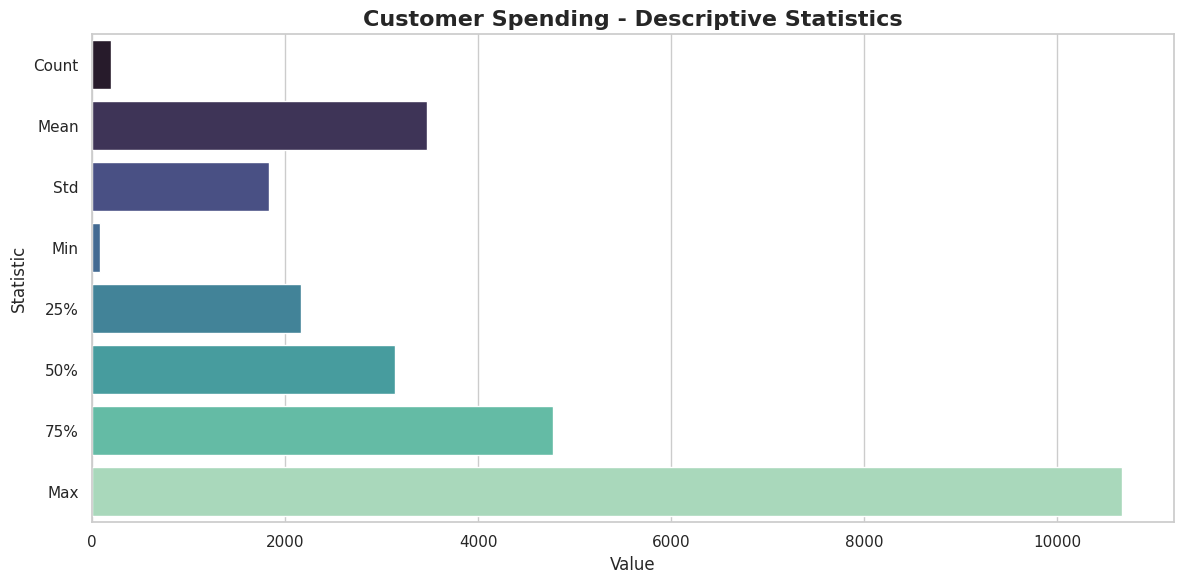

<ipython-input-45-df60c51b88f9>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


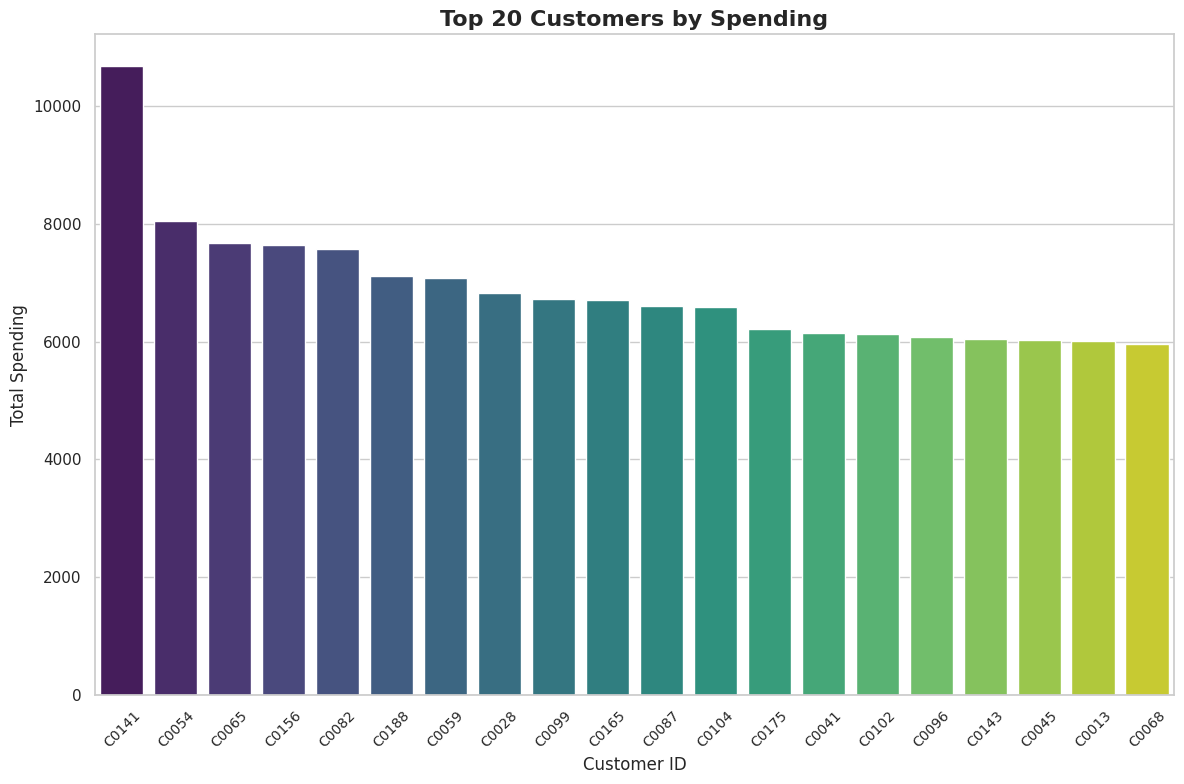

In [45]:
#Top 20 Customer By Spending
customer_spending = merged_data.groupby('CustomerID')['TotalValue'].sum()
customer_spending_sorted = customer_spending.sort_values(ascending=False)

spending_stats = customer_spending.describe()

stats_labels = ["Count", "Mean", "Std", "Min", "25%", "50%", "75%", "Max"]
stats_values = [
    spending_stats["count"], spending_stats["mean"], spending_stats["std"],
    spending_stats["min"], spending_stats["25%"], spending_stats["50%"],
    spending_stats["75%"], spending_stats["max"]
]

plt.figure(figsize=(12, 6))
sns.barplot(x=stats_values, y=stats_labels, palette="mako", orient="h")
plt.title("Customer Spending - Descriptive Statistics", fontsize=16, fontweight="bold")
plt.xlabel("Value", fontsize=12)
plt.ylabel("Statistic", fontsize=12)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))
sns.barplot(
    x=top_20_customers.index,
    y=top_20_customers.values,
    palette="viridis"
)

plt.title("Top 20 Customers by Spending", fontsize=16, fontweight="bold")
plt.xlabel("Customer ID", fontsize=12)
plt.ylabel("Total Spending", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

plt.show()

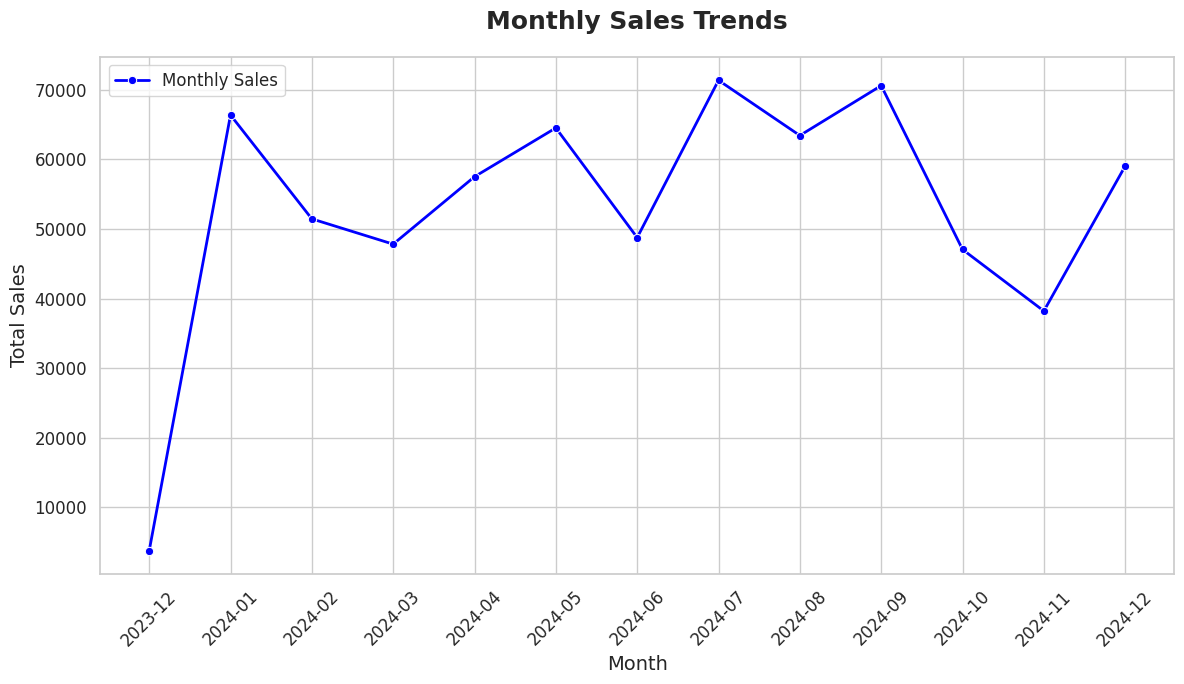

In [46]:
# 3. Monthy Sales
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')

monthly_sales = merged_data.groupby('Month')['TotalValue'].sum().reset_index()

monthly_sales['Month'] = monthly_sales['Month'].astype(str)

sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(12, 7))
sns.lineplot(
    data=monthly_sales,
    x='Month',
    y='TotalValue',
    marker='o',
    linewidth=2,
    color='blue',
    label='Monthly Sales'
)

plt.title("Monthly Sales Trends", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Sales", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='upper left')
plt.tight_layout()

plt.show()


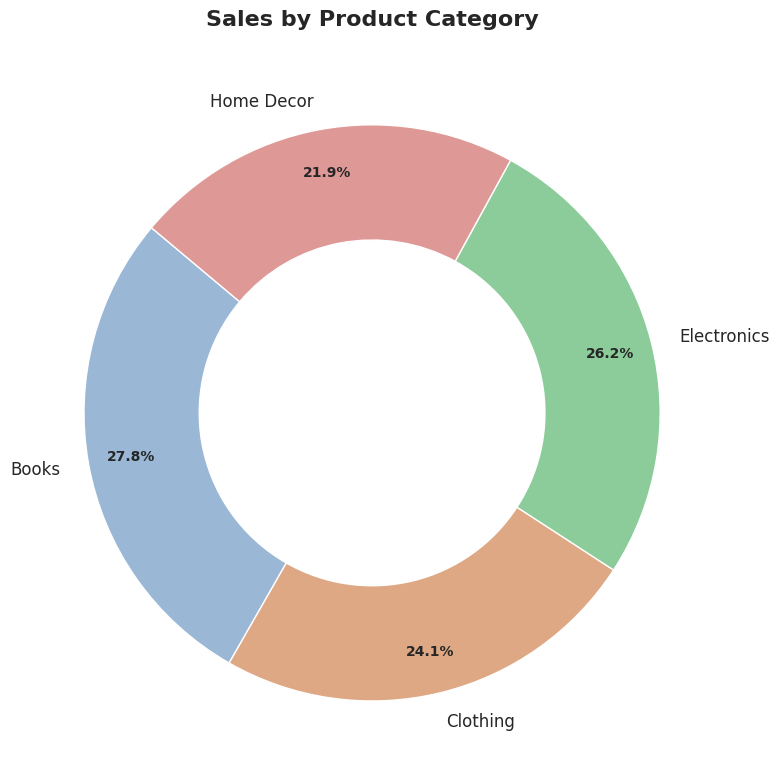

In [47]:
# 4.Sales by Product Category
category_sales = merged_data.groupby('Category')['TotalValue'].sum()

colors = sns.color_palette('pastel')

fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(
    category_sales.values,
    labels=category_sales.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w'),
    pctdistance=0.85
)

for wedge in wedges:
    wedge.set_facecolor(tuple(np.array(wedge.get_facecolor()) * 0.85))

plt.setp(texts, size=12)
plt.setp(autotexts, size=10, weight='bold')
ax.set_title("Sales by Product Category", fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()



Regional Sales Performance:
Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


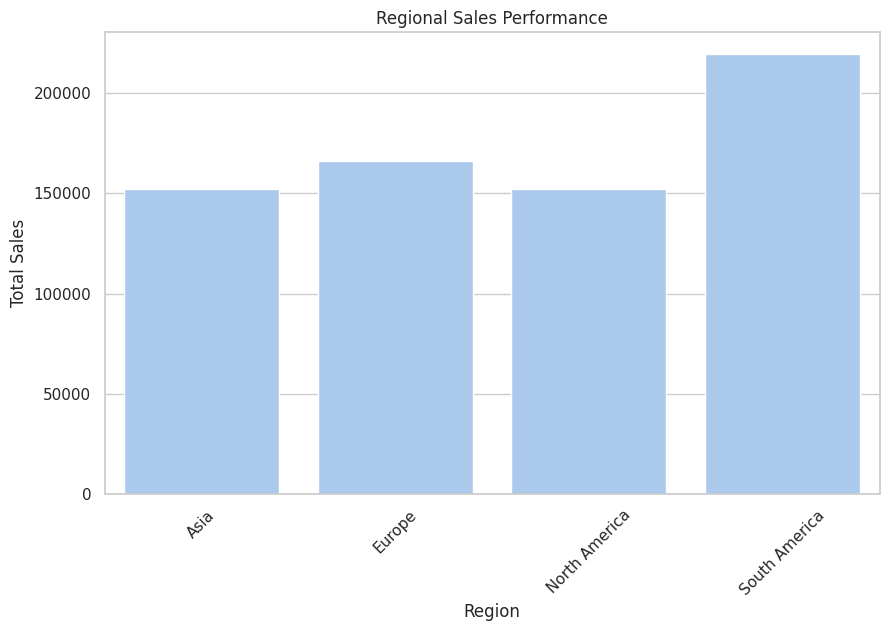

In [48]:
# 5. Regional performance
regional_sales = merged_data.groupby('Region')['TotalValue'].sum()
print("\nRegional Sales Performance:")
print(regional_sales)

plt.figure(figsize=(10, 6))
sns.barplot(x=regional_sales.index, y=regional_sales.values)
plt.title("Regional Sales Performance")
plt.ylabel("Total Sales")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()